In [1]:
import sys
sys.path.extend(["../", "../src", "../config"])

In [2]:
from preprocess import PreProcess
import pandas as pd
import seaborn as sb
import spacy
from evaluation import EvaluateSimilarity

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suvro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_json("../data.json")

In [4]:
df

,level,description,title
0,Entry Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Frontend Engineer (m/f)
1,Senior Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Senior Product Manager (m/f)
2,Entry Level,JOB DESCRIPTION\nPamet is looking for Android ...,Android Developer
3,Senior Level,We are looking for a Development Lead with 5+ ...,Development Lead
4,Entry Level,JOB DESCRIPTION\nPamet is looking for a IBM We...,IBM WebSphere Portal Developer
...,...,...,...
211,NaN,Work in a one of a kind international environm...,Native Italian Translation Internship
212,NaN,Work in a unique international environment and...,International Translation Internship Program (...
213,NaN,Photography - New York Habitat Internship\nWho...,Photography - New York Habitat Internship
214,NaN,Are you free every day from 10:30am - 1:30pm a...,High Paying Part Time Delivery Driver


In [5]:
# Tranining samples
train = df[~df['level'].isna()]
len(train)

141

In [6]:
# Test samples
test = df[df['level'].isna()]
len(test)

75

### Analyze training data

<Axes: xlabel='level', ylabel='count'>

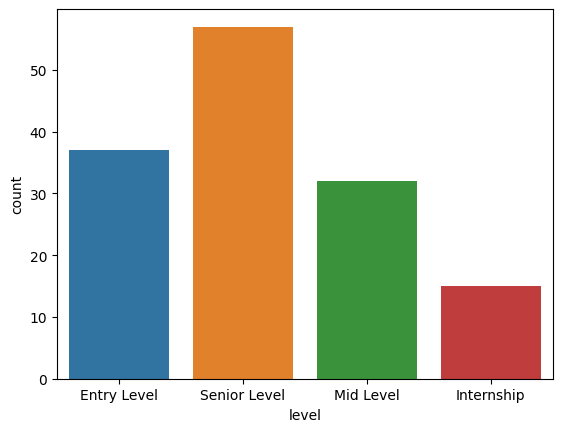

In [7]:
sb.countplot(data=train, x='level')

In [8]:
test_pred = pd.read_json("../outputs/test_pred.json")

In [9]:
test_pred

,level,description,title
0,Entry Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Customer Service Netherlands in Berlin (m/f)
1,Senior Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,DevOps Engineer (m/f)
2,Senior Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Head of Product Management (IT) (m/f)
3,Entry Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Help Desk Support (m/f)
4,Internship,OUTFITTERY is Europe’s biggest Personal Shoppi...,Intern Help Desk (m/f)
...,...,...,...
70,Entry Level,Work in a one of a kind international environm...,Native Italian Translation Internship
71,Internship,Work in a unique international environment and...,International Translation Internship Program (...
72,Internship,Photography - New York Habitat Internship\nWho...,Photography - New York Habitat Internship
73,Entry Level,Are you free every day from 10:30am - 1:30pm a...,High Paying Part Time Delivery Driver


### Evaluate test prediction by similarity with train

In [10]:
eval = EvaluateSimilarity(predicted=test_pred, reference=train)

In [11]:
df_sim = eval.calculate_similarity_score()

E:\interview_tasks\smartrecruiters\ict-job-levels-suvrodeep-ghosh\notebooks\../src\evaluation.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desc_title'] = data['title'].astype(str) + " " + data['description'].astype(str)
E:\interview_tasks\smartrecruiters\ict-job-levels-suvrodeep-ghosh\notebooks\../src\evaluation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desc_title'] = preprocess.spacy_remove_stop_words(
E:\interview_tasks\smartrecruiters\ict-job-levels-suvrodeep-ghosh\notebook

In [12]:
df_sim

,0
Mid Level,88.17
Internship,87.84
Entry Level,81.65
Senior Level,91.14
